# Auswertung Wegstrecken der Simulation

In [13]:
import pandas as pd
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import os
import pickle

In [14]:
# Laden der Simulationsergebnisse
path = r"C:\Users\thoma\Desktop\ev-modelling-repo\Simulationsergebnisse\Results_6_WT_250k_CS3.csv"
df = pd.read_csv(path)

In [15]:
data.head()

,Trip_id,Trip_no,Whyfrom,Whyto,Departure,Departure_t,Arrival,Trip_duration,Distance,Stay_duration,Soc_start,Soc_end,Charge_start,Charge_end
0,0.1,1,1,2,360.0,24,362.0,2.0,1.18,433,100.0,99.7,362.0,364.0
1,0.2,2,2,3,795.0,53,796.0,1.0,0.33,306,100.0,99.9,796.0,797.0
2,0.3,3,3,1,1102.0,73,1103.0,1.0,0.29,922,100.0,99.9,1103.0,1104.0
3,1.1,1,1,3,801.0,53,811.0,10.0,5.54,100,100.0,98.6,811.0,828.0
4,1.2,2,3,1,911.0,61,923.0,12.0,6.63,1070,100.0,98.4,923.0,943.0


## Wegstrecken in 2-dimensionaler Liste Speichern 
wege_ij[i-1][j-1] entspricht der Liste aller Wegstrecken vom Zustand i zum Zustand j

In [16]:
# initialisieren 5x5 Liste 
wege_ij = [[0 for i in range(5)] for j in range(5)]

In [17]:
for i in range(1, 6):
    for j in range(1, 6):
        if j == i:
            continue
        # filtern des Dataframes nach Ausgangs- und Zielzustandskombinationen
        filt = (data["Whyfrom"] == i) & (data["Whyto"] == j)
        # speichern der Liste der Distanzen zwischen den Zuständen in entsprechendem Feld
        wege_ij[i-1][j-1] = list(data[filt]["Distance"])

## Visualisieren der Histogramme

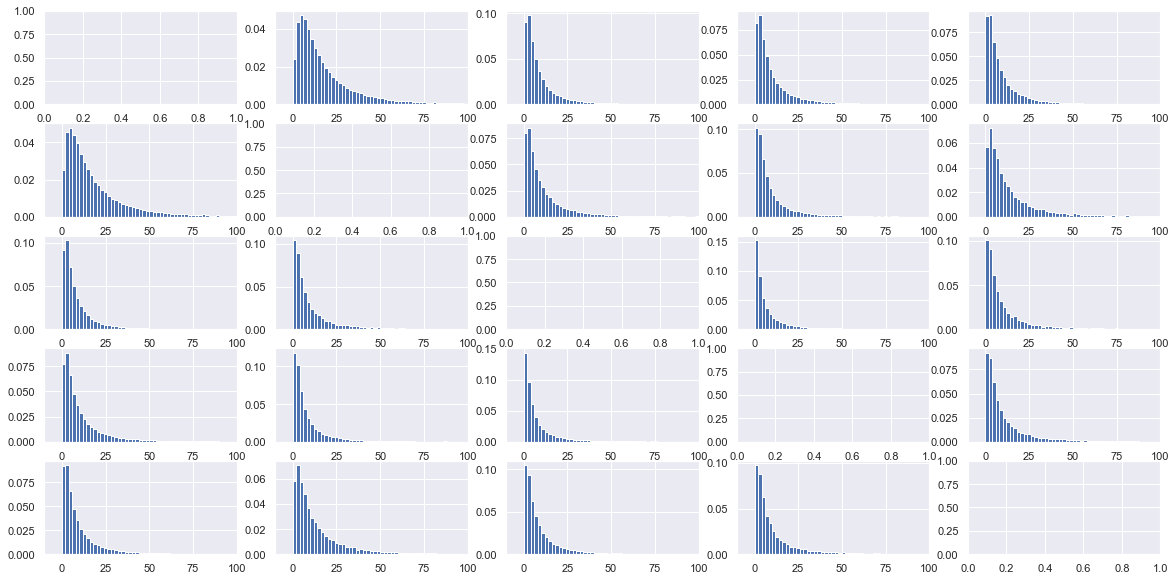

In [18]:
sns.set()
fig, axs = plt.subplots(5, 5, figsize=(20,10))
for i in range(5):
    for j in range(5):
        if i == j:
            continue
        axs[i][j].hist(wege_ij[i][j], bins=range(int(min(wege_ij[i][j])), int(max(wege_ij[i][j])) + 1, 2), density=True)
        axs[i][j].set_xlim(-10, 100)

In [19]:
# initialisieren 5x5 Liste für Parameter der Verteilungsfunktion 
shape_ij = [[0 for i in range(5)] for j in range(5)]
scale_ij = [[0 for i in range(5)] for j in range(5)]
loc_ij = [[0 for i in range(5)] for j in range(5)]
pdf_ij = [[0 for i in range(5)] for j in range(5)]
x = np.linspace(0, 500, 1000)

for i in range(5):
    for j in range(5):
        if j == i:
            continue
        shape_ij[i][j], loc_ij[i][j], scale_ij[i][j] = stats.lognorm.fit(wege_ij[i][j], loc=0, scale=5)
        pdf_ij[i][j] = stats.lognorm.pdf(x, s=shape_ij[i][j], loc=loc_ij[i][j], scale=scale_ij[i][j])

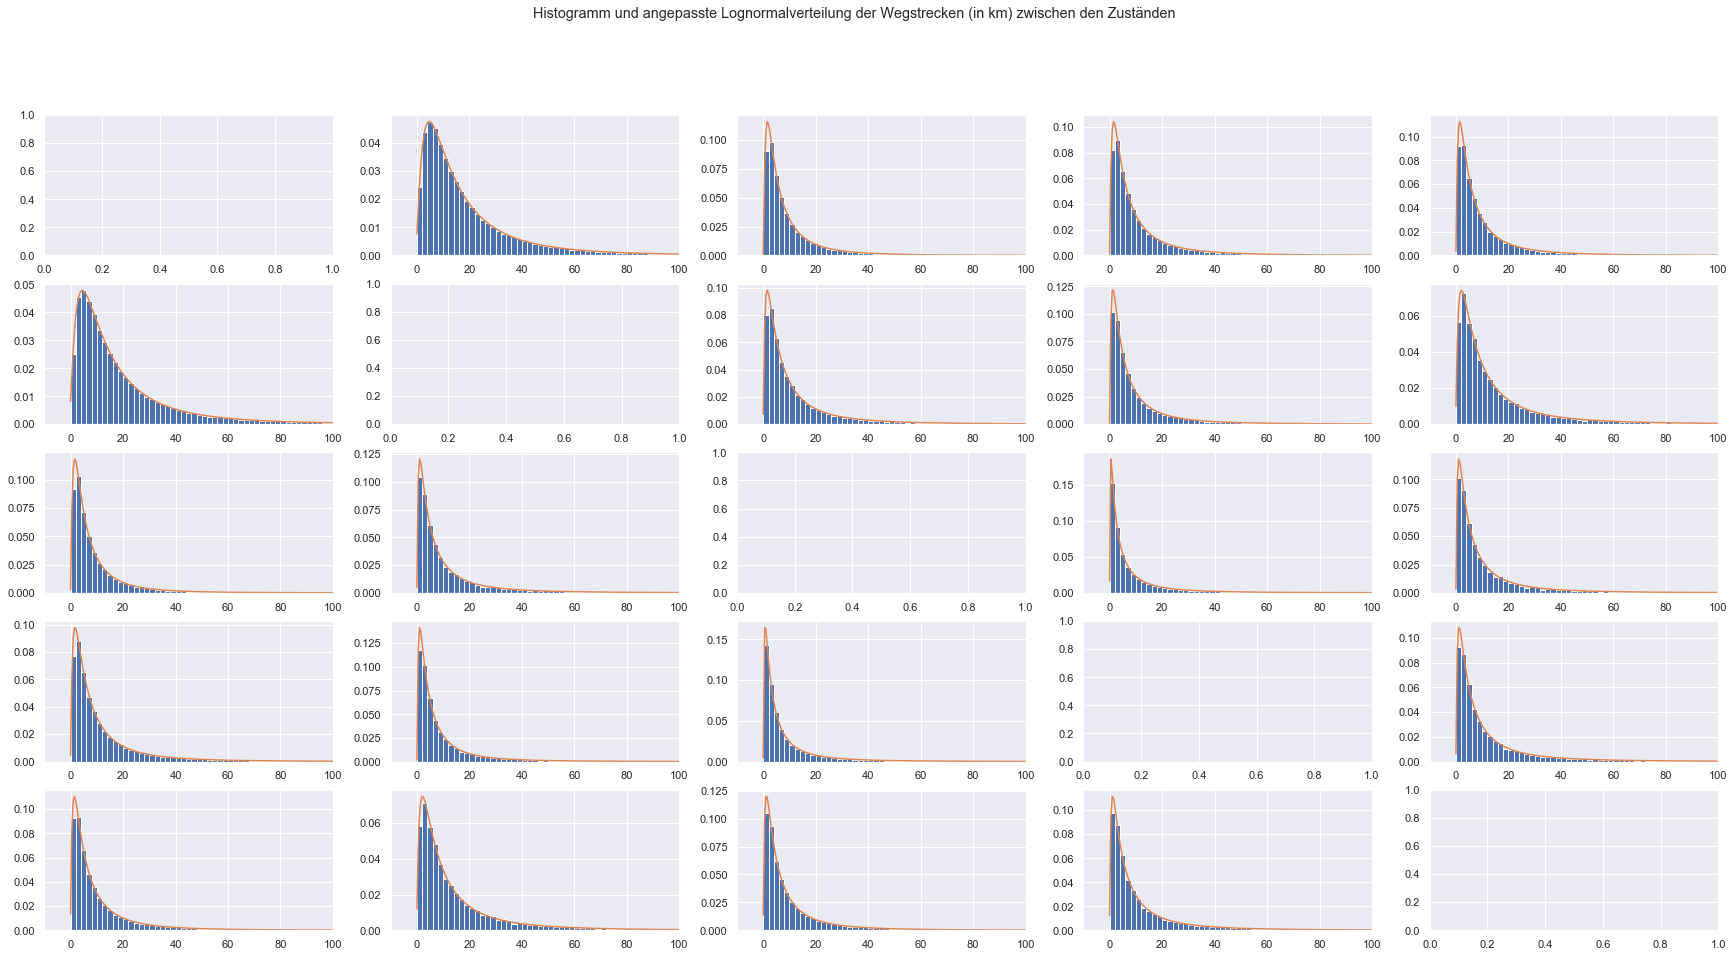

In [20]:
fig, axs = plt.subplots(5, 5, figsize=(30,15))
for i in range(5):
    for j in range(5):
        if i==j:
            continue
        axs[i][j].hist(wege_ij[i][j], bins=range(int(min(wege_ij[i][j])), int(max(wege_ij[i][j])) + 1, 2), density=True)
        axs[i][j].set_xlim(-10, 100)
        axs[i][j].plot(x, pdf_ij[i][j])
fig.suptitle("Histogramm und angepasste Lognormalverteilung der Wegstrecken (in km) zwischen den Zuständen");

# Vergleich mit Verteilungsfunktion der Ausgangsdaten

In [21]:
# Parameter der Ausgangsverteilungsfunktion
dist_wd_shape_ij = pickle.load(open(r"C:\Users\thoma\Desktop\ev-modelling-repo\Datenauswertung\Werktag\Simulationsdaten\Verteilung_Wegstrecken_Werktage_Shape.pickle", "rb"))
dist_wd_scale_ij = pickle.load(open(r"C:\Users\thoma\Desktop\ev-modelling-repo\Datenauswertung\Werktag\Simulationsdaten\Verteilung_Wegstrecken_Werktage_Scale.pickle", "rb"))
dist_wd_loc_ij = pickle.load(open(r"C:\Users\thoma\Desktop\ev-modelling-repo\Datenauswertung\Werktag\Simulationsdaten\Verteilung_Wegstrecken_Werktage_Loc.pickle", "rb"))

orig_pdf_ij = [[0 for i in range(5)] for j in range(5)]

for i in range(5):
    for j in range(5):
        if j == i:
            continue
        orig_pdf_ij[i][j] = stats.lognorm.pdf(x, s=shape_ij[i][j], loc=loc_ij[i][j], scale=scale_ij[i][j])

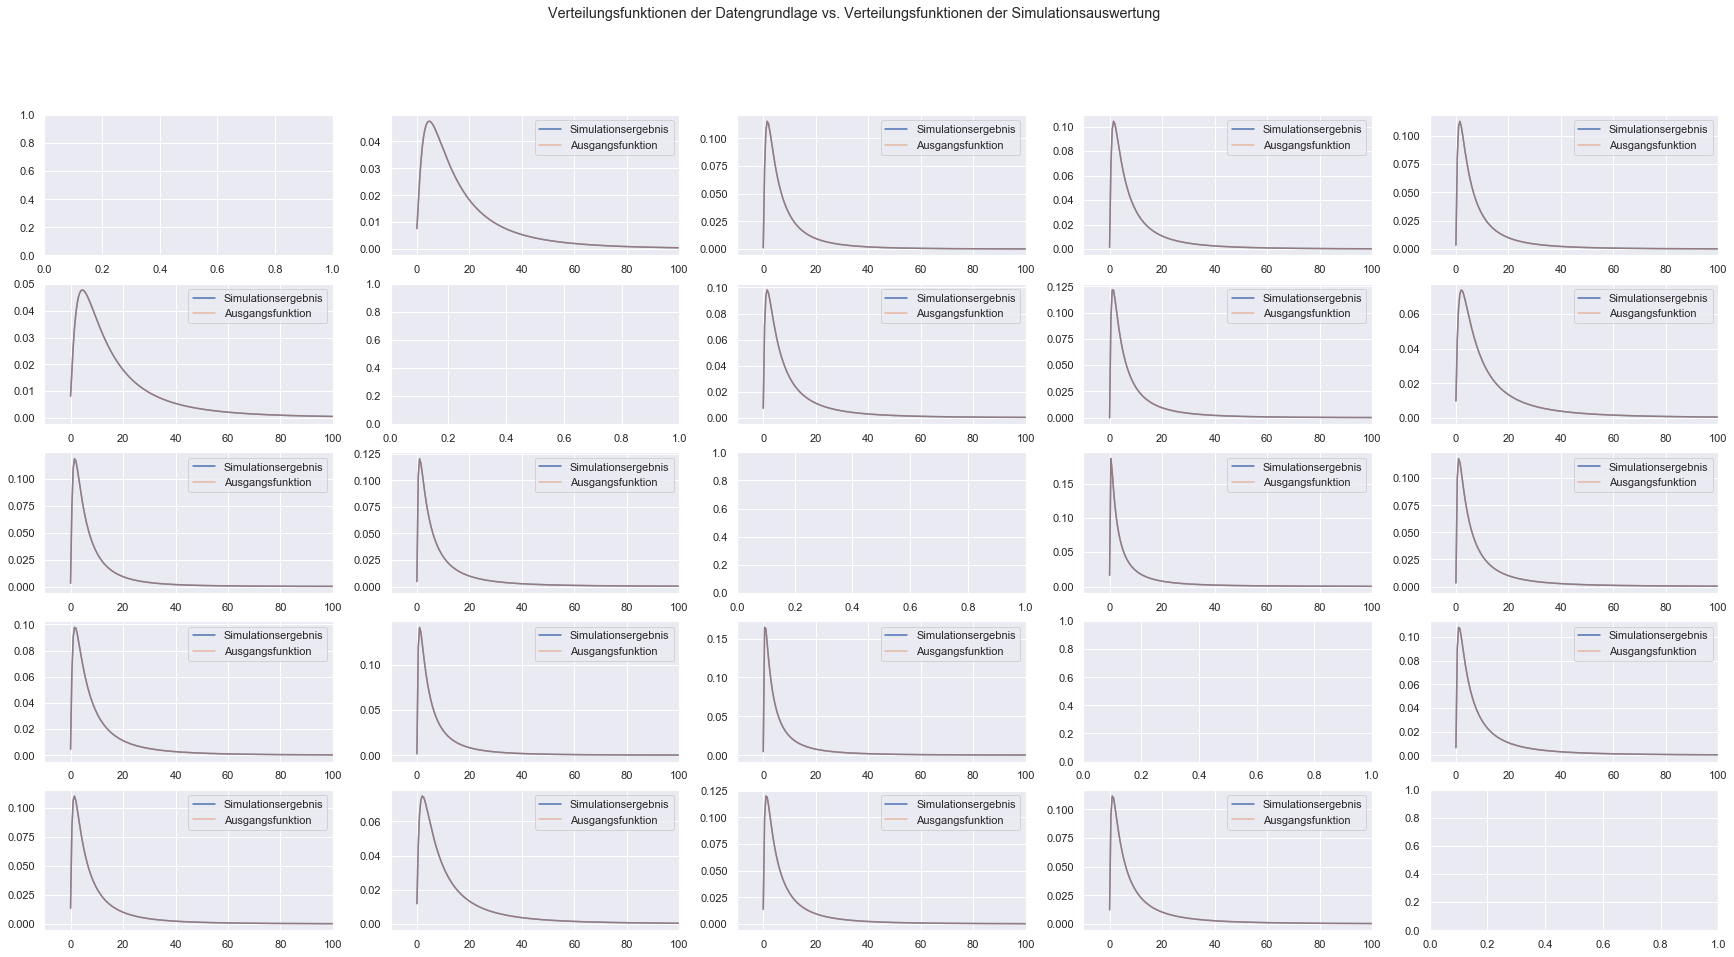

In [22]:
fig, axs = plt.subplots(5, 5, figsize=(30,15))
for i in range(5):
    for j in range(5):
        if i==j:
            continue
        axs[i][j].plot(x, pdf_ij[i][j], label="Simulationsergebnis")
        axs[i][j].plot(x, orig_pdf_ij[i][j], label="Ausgangsfunktion", alpha = 0.5)
        axs[i][j].legend()
        axs[i][j].set_xlim(-10, 100)
fig.suptitle("Verteilungsfunktionen der Datengrundlage vs. Verteilungsfunktionen der Simulationsauswertung");

# Vergleich der Histogramme der Wegstrecken

In [23]:
orig_wege_ij = pickle.load(open(r"C:\Users\thoma\Desktop\ev-modelling-repo\Datenauswertung\Werktag\Simulationsdaten\Liste_Wegstrecken_Werktage.pickle", "rb"))

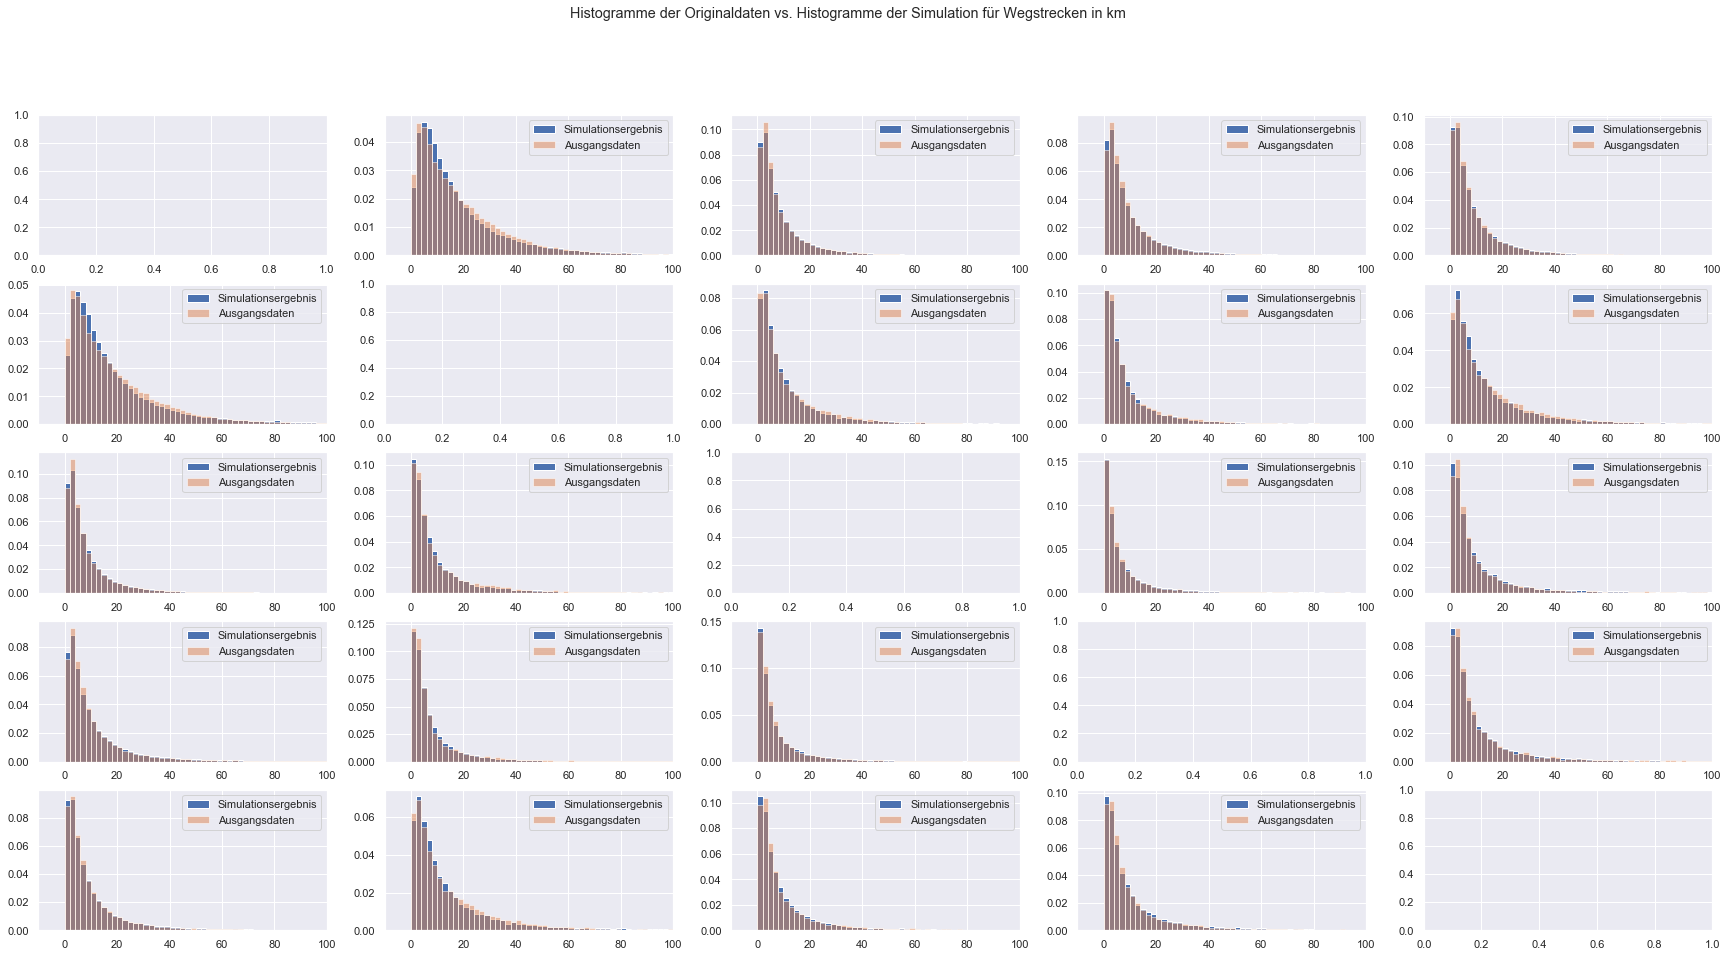

In [24]:
fig, axs = plt.subplots(5, 5, figsize=(30,15))
for i in range(5):
    for j in range(5):
        if i==j:
            continue
        axs[i][j].hist(wege_ij[i][j], bins=range(int(min(wege_ij[i][j])), int(max(wege_ij[i][j])) + 1, 2), label="Simulationsergebnis", density=True)
        axs[i][j].hist(orig_wege_ij[i][j], bins=range(int(min(wege_ij[i][j])), int(max(wege_ij[i][j])) + 1, 2), label="Ausgangsdaten", alpha=0.5,  density=True)
        axs[i][j].legend()
        axs[i][j].set_xlim(-10, 100)
fig.suptitle("Histogramme der Originaldaten vs. Histogramme der Simulation für Wegstrecken in km");